# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## I. Exploration des données et prise en main de pandas DataFrame

### Imports

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv

### 1. Inputs

#### vre profiles

In [14]:
vre2017 = pd.read_csv("inputs/vre_profiles2017.csv")
vre2017.columns = ["vre", "heure", "prod"]
vre2017
#print(vre2017['offshore']=='onshore'
#vre2017["0"].loc[1]
#vre2017["prod"][1]

,vre,heure,prod
0,offshore,1,0.400714
1,offshore,2,0.406429
2,offshore,3,0.414429
3,offshore,4,0.433429
4,offshore,5,0.473857
...,...,...,...
26274,pv,8755,0.000000
26275,pv,8756,0.000000
26276,pv,8757,0.000000
26277,pv,8758,0.000000


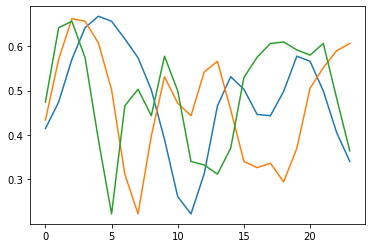

In [26]:
profil_offshore_jour = np.zeros((24,365))
for j in range(1,366):
    for i in range(1,25):
        profil_offshore_jour[i-1,j-1] += [vre2017["prod"][i*j]]

profil_offshore_jour
# for jour in range(365):
#     plt.plot(profil_offshore_jour[:,jour])
# plt.show()
plt.plot(profil_offshore_jour[:,1])
plt.plot(profil_offshore_jour[:,2])
plt.plot(profil_offshore_jour[:,3])

##### Coûts variables

In [3]:
vO = pd.read_csv("inputs/vO&M.csv")
vO

,offshore,0
0,Onshore,0.000000
1,PV,0.000000
2,river,0.000000
3,lake,0.000000
4,biogas,0.082000
5,PHS,0.000000
6,Battery,0.002100
7,methanation,0.005444


##### Coûts fixes

In [4]:
fO = pd.read_csv("inputs/fO&M.csv")
fO

,Offshore,47.0318
0,Onshore,34.547700
1,PV,9.226193
2,river,14.850000
3,lake,11.375000
4,biogas,0.000000
5,gas,16.500000
6,PHS,7.500000
7,Battery,1.960000
8,methanation,0.000000


In [5]:
#fO18 = pd.read_csv("inputs/fO&M_18.csv")
#fO18 #cumulées sur les 18 années 

In [6]:
str_a = pd.read_csv("inputs/str_annuities.csv")
str_a
#annuités des stockages

,phs,0.246937718
0,battery,10.633975
1,methanation,0.000000


In [7]:
#str_a_18 = pd.read_csv("inputs/str_annuities_18.csv")
#str_a_18
#annuités des stockages sur les 18 années cumulées

##### Capacités 

In [8]:
existing_capas = pd.read_csv("inputs/existing_capas.csv")
print('existing_capas\n')
print(existing_capas)
existing_capasn = pd.read_csv("inputs/existing_capasn.csv")
print('\n existing_capasn\n')
print(existing_capasn)
max_capas = pd.read_csv("inputs/max_capas.csv")
print('\n max capas \n')
print(max_capas)

existing_capas

      offshore       0
0      onshore   0.000
1           pv   0.000
2        river   7.500
3         lake  12.855
4       biogas   0.000
5          phs   4.940
6      battery   0.000
7  methanation   0.000

 existing_capasn

  river  10.5
0  lake  10.1
1   phs   4.6

 max capas 

      offshore     20
0      onshore  120.0
1           pv  218.0
2        river    7.5
3         lake   13.0
4       biogas  100.0
5          phs    9.3
6      battery  100.0
7  methanation  100.0


In [9]:
lake_in = pd.read_csv("inputs/lake_inflows.csv")
lake_in

,jan,1.3642965
0,feb,1.917242
1,mar,1.832127
2,apr,1.418871
3,may,1.035813
4,jun,1.590091
5,jul,1.164176
6,aug,0.930260
7,sep,1.053223
8,oct,0.938100
9,nov,0.861544


In [10]:
#lake_in18 = pd.read_csv("inputs/lake_inflows18.csv")
#lake_in18 #sur les 18 années (12 mois * 18 ans)

In [11]:
#lake19 = pd.read_csv("inputs/lake19.csv")
#lake19    #sur 19 années ?

In [12]:
#correspondance heure années / mois 
#months = pd.read_csv("inputs/months.csv")  
#correspondance des heures / mois sur 18 ans
#months = pd.read_csv("inputs/months_18.csv")
#months

#### Réserves nécessaires

In [13]:
reserve_r = pd.read_csv("inputs/reserve_requirements.csv")
reserve_r

,offshore,0.027
0,onshore,0.027
1,PV,0.038


In [14]:
#river_18 = pd.read_csv("inputs/river_18.csv")
#river_18

In [15]:
#run_r = pd.read_csv("inputs/run_of_river.csv")
#run_r

##### Demande ADEME, RTE, Negawatt

In [16]:
ADEME = pd.read_csv("inputs/demand2050_ademe.csv")
ADEME.columns = ["heures", "demande"]

In [17]:
RTE = pd.read_csv("inputs/demand2050_rte.csv")
RTE.columns = ["heures", "demande"]

In [18]:
Negawatt = pd.read_csv("inputs/demand2050_negawatt.csv")
Negawatt.columns = ["heures", "demande"]

Text(0.5, 1.0, 'Profils des demandes selon différents établissements')

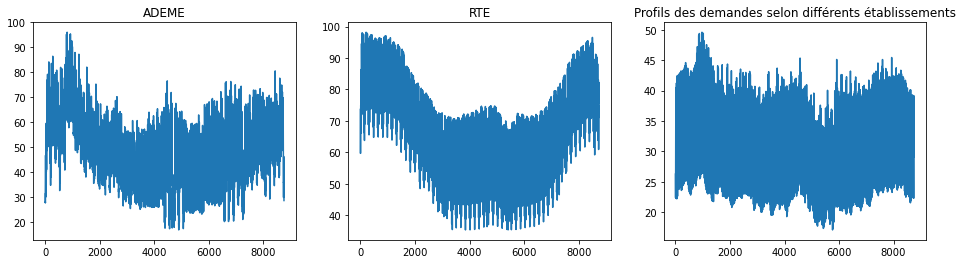

In [35]:
f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(ADEME.demande)
ax.set_title("ADEME")

ax2.plot(RTE.demande)
ax2.set_title("RTE")

ax3.plot(Negawatt.demande)
ax3.set_title("Negawatt")

plt.title("Profils des demandes selon différents établissements")

In [22]:
# mois = [0,743,1439,2183,2903,3647,4367,5111,5855,6575,7319,8039]
# for m in mois:
#     plt.plot(ADEME.loc[m].demande)
#     plt.plot(RTE.loc[m].demande)
#     plt.plot(Negawatt.loc[m].demande)
# plt.show()

### 2. Outputs

#### Weather 

In [36]:
meteo = pd.read_csv("outputs/weather years.csv", index_col='year')
meteo.head(7)

,Offshore_capa,Onshore_capa,PV_capa,biogas_capa,hydro_capa,Batt_volume,Methanation_volume,PHS_volume,Offshore_gene,Onshore_gene,...,Methanation_gene,PHS_gene,LCOE,spot_price,LC,str_loss,cf_offshore,cf_onshore,cf_pv,cf_gas
year,,,,,,,,,,,,,,,,,,,,,
2000,11.46,84.14,105.74,18.24,20.5,60.17,5.52,180,54.08,246.41,...,7.21,23.86,47.89,53.83,11.64,5.06,0.538,0.334,0.158,0.139
2001,0.38,104.62,105.74,28.61,20.5,41.91,8.45,180,1.77,307.32,...,7.33,20.88,48.40,54.20,12.76,4.87,0.537,0.335,0.162,0.089
2002,17.12,69.66,105.55,19.16,20.5,74.70,4.60,180,82.05,212.44,...,6.31,22.09,46.82,54.60,10.90,4.62,0.547,0.348,0.157,0.127
2003,10.21,90.15,106.83,15.70,20.5,62.78,5.62,180,44.99,245.26,...,4.90,22.09,49.31,54.21,12.38,3.76,0.503,0.311,0.164,0.088
2004,0.00,105.29,113.38,21.88,20.5,70.32,15.30,180,0.00,296.53,...,9.95,21.24,50.51,56.91,11.75,6.43,0.509,0.322,0.161,0.130
2005,0.00,105.89,110.38,25.22,20.5,60.27,9.37,180,0.00,290.19,...,7.64,23.15,49.81,54.18,11.94,5.26,0.507,0.312,0.165,0.102
2006,12.36,80.08,122.17,32.89,20.5,74.62,12.90,180,56.90,227.80,...,10.07,21.89,51.65,56.46,11.99,6.53,0.525,0.324,0.162,0.087


In [24]:
meteo.columns

Index(['Offshore_capa', 'Onshore_capa', 'PV_capa', 'biogas_capa', 'hydro_capa',
       'Batt_volume', 'Methanation_volume', 'PHS_volume', 'Offshore_gene',
       'Onshore_gene', 'PV_gene', 'biogas_gene', 'hydro_gene', 'Batt_gene',
       'Methanation_gene', 'PHS_gene', 'LCOE', 'spot_price', 'LC', 'str_loss',
       'cf_offshore', 'cf_onshore', 'cf_pv', 'cf_gas'],
      dtype='object')

#### LCOEs

In [25]:
lcoes = pd.read_csv("outputs/LCOEs.csv", index_col='scen')
lcoes.head()

,Offshore,Onshore,PV,Battery,Methanation
scen,,,,,
1,31.2639559,29.769865,14.463033,35.934992,113.700077
2,31.29251698,29.772761,14.462797,45.017851,158.704056
3,31.29305623,29.772880,14.463192,58.244078,202.392026
4,#DIV/0!,29.772013,14.463604,64.026512,125.551402
5,31.29994165,29.770172,14.463301,75.648587,172.616901


#### Scénarios

In [26]:
sce = pd.read_csv("outputs/scenarios.csv")
sce.head()

,scen,offshore,onshore,pv,battery,methanation,offshore.1,onshore.1,pv.1,battery.1,methanation.1
0,1,143.988965,84.683285,20.5668,5.316988,71.705432,-25%,-25%,-50%,-50%,-50%
1,2,143.988965,84.683285,20.5668,5.316988,143.410864,-25%,-25%,-50%,-50%,central
2,3,143.988965,84.683285,20.5668,5.316988,215.116296,-25%,-25%,-50%,-50%,50%
3,4,143.988965,84.683285,20.5668,10.633975,71.705432,-25%,-25%,-50%,central,-50%
4,5,143.988965,84.683285,20.5668,10.633975,143.410864,-25%,-25%,-50%,central,central


In [27]:
#Optimization results
scen2006 = pd.read_csv("outputs/real CF after internalization of LC/2006_LC_internalized.csv", index_col = "hour")
scen2006.columns = ['offshore', 'onshore', 'pv', 'river', 'lake', 'biogas', 'gas', 'phs',
                    'battery', 'methanation', 'Electricity demand', 'Storage phs', 'Storage battery', 
                    'Storage methanation','Stored battery', 'Stored phs', 'Stored methanation', 
                    'elec_price', 'gas_price']
scen2006.head(10)
scen2006.loc[30]

offshore                  6.58
onshore                  28.58
pv                        0.00
river                     1.21
lake                      0.00
biogas                    0.00
gas                       0.00
phs                       2.69
battery                   0.00
methanation               0.00
Electricity demand       31.40
Storage phs               0.00
Storage battery           0.00
Storage methanation      -7.66
Stored battery           74.14
Stored phs              180.00
Stored methanation     1949.00
elec_price                0.00
gas_price                 0.00
Name: 30, dtype: float64

In [28]:
scen2006.columns
#scen2006.dtypes

Index(['offshore', 'onshore', 'pv', 'river', 'lake', 'biogas', 'gas', 'phs',
       'battery', 'methanation', 'Electricity demand', 'Storage phs',
       'Storage battery', 'Storage methanation', 'Stored battery',
       'Stored phs', 'Stored methanation', 'elec_price', 'gas_price'],
      dtype='object')

In [29]:
#accès à une valeur
scen2006['Storage methanation']
#scen2006['Electricity demand']
scen2006['pv'][0]

0.0

#### Sensitivity results

In [30]:
sens = pd.read_csv("outputs/sensitivity results.csv")
sens.head()

,scen,cost,offshore,onshore,PV,biogas,battery_dch,methanation_dch,battery_ch,methaantion_ch,...,onshore_gene,PV_gene,battery_gene,PHS_gene,methanation_gene,LCOE1,LCOE2,marginal_cost,LC,str_loss
0,1,15.38,3.22,68.21,182.88,27.77,30.94,27.77,30.94,9.51,...,194.03,260.06,40.93,24.93,12.04,29.09,36.42,37.72,11.74,8.41
1,2,15.90,11.54,62.95,172.80,27.99,28.46,27.99,28.46,5.28,...,179.05,245.73,30.81,27.58,8.18,29.56,37.64,38.75,15.43,6.05
2,3,16.20,15.30,62.56,171.56,27.92,27.72,27.92,27.72,2.92,...,177.94,243.96,23.42,29.23,4.96,29.34,38.36,39.52,19.42,4.10
3,4,16.06,0.00,89.52,147.57,32.26,21.38,32.26,21.38,10.50,...,254.63,209.84,19.87,25.30,12.37,30.62,38.02,41.39,11.48,7.99
4,5,16.59,6.78,84.41,147.37,32.39,21.42,32.39,21.42,5.47,...,240.11,209.56,16.43,29.75,8.11,30.67,39.27,42.32,16.31,5.59


#### Robustness

In [31]:
robus = pd.read_csv("outputs/robustness results.csv")
robus.head(5)

,scen,state,cost,opt_cost,regret,regret_share,offshore_gene,onshore_gene,PV_gene,battery_gene,methanation_gene,LCOE1,LCOE2,LC,str_loss,Price,Regret%,Unnamed: 17
0,158,1,16.14,15.38,0.76,0.047088,56.93,227.67,173.85,8.85,11.88,27.19,37.88,15.45,6.98,22.63,mean,0.044796
1,158,2,16.69,15.90,0.79,0.047334,56.93,227.67,173.85,8.85,11.88,28.20,39.18,15.45,6.98,22.63,Median,0.041871
2,158,3,17.24,16.20,1.04,0.060325,56.93,227.67,173.85,8.85,11.88,29.21,40.49,15.45,6.98,22.63,3rd Quartile,0.058114
3,158,4,16.34,16.06,0.28,0.017136,56.93,227.67,173.85,6.78,11.61,27.49,38.35,15.82,6.76,26.41,1st Quartile,0.026566
4,158,5,16.89,16.59,0.30,0.017762,56.93,227.67,173.85,6.78,11.61,28.50,39.66,15.82,6.76,26.41,LCOE,NaN


In [32]:
d2016 = pd.read_csv("outputs/with 2016 demand/hourly profiles with demand of 2016.csv")
d2016.head(5)

,hour,offshore,onshore,pv,river,lake,biogas,gas,phs,battery,methanation,demand,Pump,ElecStr,CH4,Bat_SOC,PHS_SOC,CH4_SOC,elec_price,gas_price
0,0,14.66,50.77,0.0,1.27,0.0,0.0,0.0,1.99,0.0,0.0,60.17,0.00,0.0,-8.52,0.0,69.39,8203.50,0.0,0.0
1,1,14.91,52.38,0.0,1.30,0.0,0.0,0.0,0.00,0.0,0.0,56.68,-3.39,0.0,-8.52,0.0,67.18,8208.53,0.0,0.0
2,2,14.91,53.38,0.0,1.11,0.0,0.0,0.0,0.00,0.0,0.0,55.78,-5.09,0.0,-8.52,0.0,70.40,8213.56,0.0,0.0
3,3,14.80,53.74,0.0,1.12,0.0,0.0,0.0,0.00,0.0,0.0,53.16,-7.97,0.0,-8.52,0.0,75.24,8218.59,0.0,0.0
4,4,14.44,53.46,0.0,1.21,0.0,0.0,0.0,0.00,0.0,0.0,50.21,-9.30,0.0,-8.52,0.0,82.81,8223.62,0.0,0.0
